# Computational Physics
## Projectile Motion

<img src="https://upload.wikimedia.org/wikipedia/commons/2/2e/Uss_iowa_bb-61_pr.jpg" width=600px>

In [1]:
'''import style
style._set_css_style('../include/bootstrap.css')'''

"import style\nstyle._set_css_style('../include/bootstrap.css')"

## Last Time

### [Notebook Link: 13_AirResistance.ipynb](./13_AirResistance.ipynb)

- modelling the motion of a bicycle
- numerical solution with air resistance

## Today

- higher derivatives
- higher dimensions


## Setting up the Notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('../include/notebook.mplstyle');
%config InlineBackend.figure_format = 'svg'

## Second Order Equations

Until now we have solved Newton's 2nd law for the velocity, i.e. we only  had to consider the 1st order ordinary differential equation:

\begin{equation}
\frac{dv}{dt} = \frac{F}{m}.
\end{equation}

However, what if we want the position $x(t)$ as a funciton of time? Newton's law is second order: 
\begin{equation}
\frac{d^2 x}{dt^2} = \frac{F}{m}.
\end{equation}

It turns out that we can still directly apply the Euler method at the cost of having two **coupled** ordinary differential equations

\begin{align}
\frac{d^2 x}{dt^2} &= \frac{dv}{dt} = \frac{F}{m} \\
\frac{d x}{dt} &= v
\end{align}

We can then apply the forward approximation of the derivative two both equations:
\begin{align}
x_{n+1} &= x_{n} + v_{n}\Delta t \\
v_{n+1} &= v_{n} + \frac{F}{m} \Delta t
\end{align}
which can be simultaneously iterated from a known initial condition $(x_0,v_0)$ at time $t=0$. 

## Trajectory of a Cannon Shell

The above equations are defined for one dimension, but they can be trivially extended to $d$ dimensions where we have $2d$ iterative equations.  Consider a cannon which shoots a projectile of mass $m$ at an initial angle $\theta_0$ with velocity $v_0$.  For simplicity we will choose the $x$ axis to be aligned with the cannon.

The vector form of Newton's second law is:

\begin{align}
m \frac{d \vec{v}}{d t} &= \vec{F}_{\rm g} + \vec{F}_{\rm drag} \\
&= -m g \hat{y} - B_2 v^2 \hat{v}
\end{align}

In order to decompose this into scalar equations in the $x$ and $y$ directions, we note that:

\begin{equation}
v = \sqrt{v_x^2 + v_y^2}
\end{equation}

and 

\begin{equation}
\hat{v} = \frac{v_x}{v} \hat{x} + \frac{v_y}{v} \hat{y}
\end{equation}

thus we have:

\begin{align}
\frac{dv_x}{dt} &= \frac{F_x}{m} = - \frac{B_2}{m} v_x \sqrt{v_x^2 + v_y^2} \\
\frac{dv_y}{dt} &= \frac{F_y}{m} = -g - \frac{B_2}{m} v_y \sqrt{v_x^2 + v_y^2} \\
\end{align}

and

\begin{align}
\frac{dx}{dt} &= v_x \\
\frac{dy}{dt} &= v_y . \\
\end{align}

#### Question: How do we know when the projectile has hit the ground?

<div class="span alert alert-success">
<h2> Team Programming challenge </h2>
Using the code scaffold below, find the intial angle that leads to a sucessful hit of a target 13.5 km away with a width of $50~\rm{m}$ if the initial projectile velocity is $v_0 = 500~\rm{m/s}$, the projectile starts $1~\rm{m}$ off the ground and $B_2/m = 4\times 10^{-5} \rm{m^{-1}}$.  How much does this differ from that needed for the exact solution when $B_2 = 0$?
</div>

<!-- 
    x,y = [0],[1]
    vx,vy = v0*np.cos(θ),v0*np.sin(θ)

        v = np.sqrt(vx**2 + vy**2)
        vx -= B2oMass * v * vx * Δt
        vy -= g*Δt + B2oMass * v * vy * Δt
        x.append(x[-1] + vx*Δt)
        y.append(y[-1] + vy*Δt)
-->

Difference in angle = 10.89˚


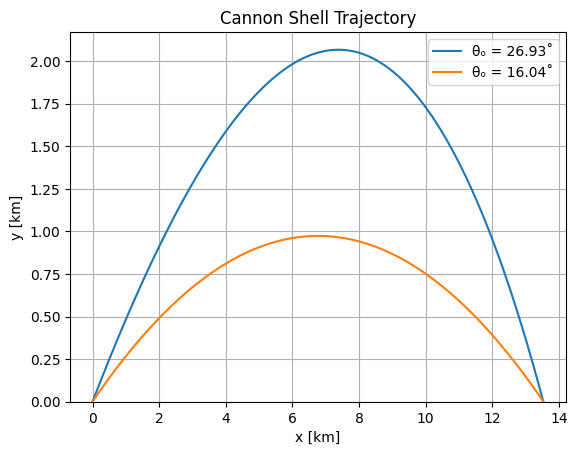

In [5]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.constants import g
from scipy.constants import pi as π

difference = []
for B2oMass in [4.0E-5,0]:
    # initialization
    #B2oMass = 4.0E-5 # 1/m
    Δt = 0.01 # s
    v0 = 500 # m/s
    θ = [0.0] 
    dθ = 0.01 # radians
    i = 0
    # Iterate the Euler equations for the positions, only storing the x and y
    # coordinates until we have a 'hit'.  
    # Hint: you will need to grow a python list

    # the target
    xmin,xmax = 13.5E3,13.55E3

    x,y = [0.0],[1.0]

    while not (xmin < x[-1] < xmax):
        x,y = [0.0],[1.0]

        v = v0

        # increment θ
        θ.append(θ[-1] + dθ)
        # setup the initial conditions for each θ
        # INSERT CODE HERE
        #xn = x(n-1) + vΔt
        vx,vy = v*np.cos(θ[-1]), v*np.sin(θ[-1])

        # iteratively solve the coupled EOMs
        while y[-1] >= 0.0:        
            # INSERT CODE HERE 
            vx += - B2oMass*v*vx*Δt 
            vy += -g*Δt - B2oMass*v*vy*Δt
            v = np.sqrt(vx**2 + vy**2)
            x.append(x[-1] + vx*Δt)
            y.append(y[-1] + vy*Δt)

                
        # make sure we haven't gone too far
            if x[-1] > xmax:
                print('Too Far!')
                break
            
    t = 13.525E3/v0

    
    # Convert x and y to numpy arrays
    x = np.array(x)
    y = np.array(y)
            
    # Plot the resulting trajectory
    plt.plot(x/1.0E3,y/1.0E3,'-',label='θₒ = %4.2f˚'%np.degrees(θ[-1]))

    # set the x and y labels and a title
    plt.xlabel('x [km]')
    plt.ylabel('y [km]')
    plt.legend()
    plt.grid(True)
    plt.title('Cannon Shell Trajectory')

    # Only show positive y-coordinates
    plt.axis(ymin=0.0);
    #print("theta = ", θ[-1],i)
    difference.append(np.degrees(θ[-1]))
print(f'Difference in angle = {difference[0]-difference[1]:.2f}˚')

    